<h1>立位時における重心動揺計を用いた身体動揺の計測<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#はじめに" data-toc-modified-id="はじめに-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>はじめに</a></span></li><li><span><a href="#計測" data-toc-modified-id="計測-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>計測</a></span><ul class="toc-item"><li><span><a href="#対象" data-toc-modified-id="対象-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>対象</a></span></li><li><span><a href="#計測・解析方法" data-toc-modified-id="計測・解析方法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>計測・解析方法</a></span></li></ul></li><li><span><a href="#解析" data-toc-modified-id="解析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>解析</a></span><ul class="toc-item"><li><span><a href="#重心動揺計に10kgの錘をのせた計測" data-toc-modified-id="重心動揺計に10kgの錘をのせた計測-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>重心動揺計に10kgの錘をのせた計測</a></span></li><li><span><a href="#重心動揺計の読み込みと解析" data-toc-modified-id="重心動揺計の読み込みと解析-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>重心動揺計の読み込みと解析</a></span></li><li><span><a href="#総軌跡長" data-toc-modified-id="総軌跡長-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>総軌跡長</a></span></li><li><span><a href="#矩形面積" data-toc-modified-id="矩形面積-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>矩形面積</a></span></li></ul></li><li><span><a href="#計測結果のまとめ" data-toc-modified-id="計測結果のまとめ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>計測結果のまとめ<br></a></span></li><li><span><a href="#考察" data-toc-modified-id="考察-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>考察</a></span></li></ul></div>

## はじめに
立っている時は，常に身体が動揺します。
 
その動揺のパターンを計測する機器があります。
 
 
**絶対に動いていない！！**と思って立っても必ず揺れます。
 
ここでは，その動揺について勉強します。

## 計測






### 対象
年齢42歳の健常成人１名。

### 計測・解析方法
重心動揺計測器（アニマ社製）を用いた。サンプリング周波数は100Hzである。プレートの上で両足を揃えた立位姿勢を保持し，開眼による計測を30秒，閉眼による計測を30秒間おこなった。計測したデータをテキスト形式でコンピュータに保存し，そのデータから以下の処理をpythonで施した。<br>

> 1.テキスト保存されたデータの読み込みと整理<br>
*ノイズ処理をする。*<br>
> 2.(今回はなし)高速フーリエ変換によるノイズ処理<br>
> 3.(今回はなし)主軸変換<br>
> 4.データの表示と確認<br>

次に，そのデータから矩形面積と総軌跡長を求め，開眼時と閉眼時の計測の動揺の違いについて比較した。

## 解析

In [5]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

### 重心動揺計に10kgの錘をのせた計測

その理由は，機器には計測値にノイズが入ることがある。また，計測者の意図しているように計測できるのか，実際に実験する前に確認する必要がある。<br>
計測器の癖を知ることで，解析データの信頼性を高める必要がある。

In [6]:
## みなさんがやるところ ##
## データの読み込み
dat10 = pd.read_csv("./Sample/Weight10/pt0419_1.csv", encoding="shift-jis", skiprows=6)

In [7]:
dat10.head()

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.00,-0.061,1.316,---.---,---.---,10.009,---.---,---.---,---.---,NaN,NaN,NaN,NaN
1,0.01,-0.061,1.316,---.---,---.---,10.009,---.---,---.---,---.---,NaN,NaN,NaN,NaN
2,0.02,-0.061,1.316,---.---,---.---,10.009,---.---,---.---,---.---,NaN,NaN,NaN,NaN
3,0.03,-0.073,1.324,---.---,---.---,10.004,---.---,---.---,---.---,NaN,NaN,NaN,NaN
4,0.04,-0.073,1.324,---.---,---.---,10.004,---.---,---.---,---.---,NaN,NaN,NaN,NaN


In [8]:
dat10.tail()

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
5996,59.96,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5997,59.97,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5998,59.98,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5999,59.99,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
6000,60.00,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN


In [9]:
## 以上で10kgをのせたときの重心動揺計の読み込みは終わり。本来はこのデータを用いて機器の特性を調べなければならない。

### 重心動揺計の読み込みと解析


In [10]:
## みなさんがやるところ ##
## 開眼のデータを読み込む。
dat_OE = pd.read_csv("./0515ohnishi/181P090_1.csv", encoding="shift-jis", skiprows=6)
datOEnp = dat_OE.iloc[:,1:3].values
datOEv = datOEnp-datOEnp.mean(axis=0)

In [11]:
## みなさんがやるところ ##
## 閉眼のデータを読み込む。
dat_CE = pd.read_csv("./0515ohnishi/181P090_2.csv", encoding="shift-jis", skiprows=6)
datCEnp = dat_CE.iloc[:,1:3].values
datCEv = datCEnp-datCEnp.mean(axis=0)

In [12]:
## 2のべき乗のデータ数に調整する
def ten2two(a):
    bb = []
    while 1:
        
        bb.insert(0,str(a%2))
        a = a//2
        
        if a==0:
            break
    
    return "".join(bb)

In [13]:
## 波数の決定
ww = int(3001*10/(1/0.01)) 

In [14]:
## フィルタリング
def FFT(a,wave,bias):
    '''
    高速フーリエ変換
    '''
    xfft = np.fft.fft(a, n=None, axis=-1, norm=None)
    xfft[wave:(-1)*wave]=0
    if bias:
        xfft[0]=0
    xifft = np.fft.ifft(xfft)
    return xifft.real

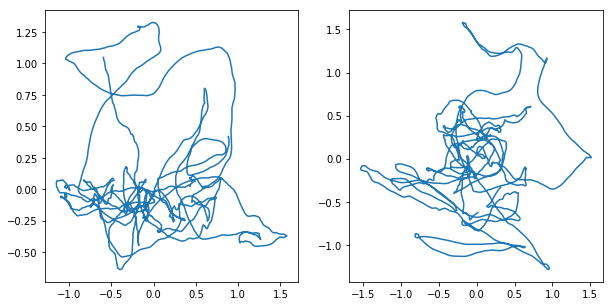

In [15]:
## みなさんがやるところ ##
## データの確認
fig ,(a1,a2) = plt.subplots(ncols=2,figsize=(10,5))
a1.plot(datOEv[:,0],datOEv[:,1])
a2.plot(datCEv[:,0],datCEv[:,1])

In [16]:
## みなさんがやるところ ##
## 縦と横のスケールを揃える。色を変える。
v =[datOEv[:,0],datOEv[:,1],datCEv[:,0],datCEv[:,1]]
vmin = list(map(min,v))
vmax = list(map(max,v))
vv = list(map(abs,vmin+vmax))
vvm= np.ceil(max(vv))
figscale = [-vvm,vvm]

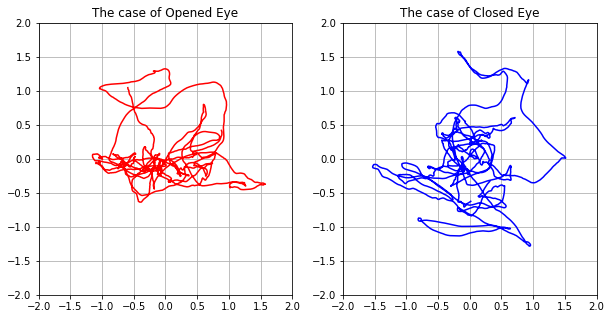

In [17]:
## みなさんがやるところ ##
# 綺麗に図を仕上げる。
fig ,(a1,a2) = plt.subplots(ncols=2,figsize=(10,5))
a1.grid()
a2.grid()
a1.plot(datOEv[:,0],datOEv[:,1],c="red")
a2.plot(datCEv[:,0],datCEv[:,1],c="blue")
a1.set_xlim(figscale)
a1.set_ylim(figscale)
a2.set_xlim(figscale)
a2.set_ylim(figscale)
a1.set_title("The case of Opened Eye")
a2.set_title("The case of Closed Eye")
plt.savefig("result_fig.png")

### 総軌跡長

あるxy座標系（デカルト座標系）にある点aと点bの間距離$d$は，<br>


$d=\sqrt{(x_a-x_b)^2+(y_a-y_b)^2}$ <br>


として，求めることができる。

In [18]:
## みなさんがやるところ ##
## 上の図をみながら・・・
## 総軌跡長
# 開眼のとき
datall = np.diff(datOEv,axis=0)                    #差分をとる
distance = datall*datall                               #2乗する
dist1 = np.sqrt(np.sum(distance,axis=1))    #平方根をとる
result1 = np.sum(dist1)                              #最後に合計する
## 結果はresult1に格納されている。
v1 = np.round(result1,2)

{{v1}}

In [19]:
## みなさんがやるところ ##
## 上の図をみながら・・・
## 総軌跡長
# 閉眼のとき
datallc = np.diff(datCEv,axis=0)                    #差分をとる
distance2 = datallc*datallc                              #2乗する
dist2 = np.sqrt(np.sum(distance2,axis=1))    #平方根をとる
result2 = np.sum(dist2)                              #最後に合計する
## 結果はresult2に格納されている。
v2=np.round(result2,2)

### 矩形面積

In [20]:
## みなさんがやるところ ##
## 矩形面積
## 開眼のとき
# x軸方向，y軸方向の最大値と最小値を求める
val1 = np.max(datOEv,axis=0)-np.min(datOEv,axis=0)
val2 = val1[0]*val1[1]
v3 = np.round(val2,2)

In [21]:
## みなさんがやるところ ##
## 矩形面積
## 閉眼のとき
# x軸方向，y軸方向の最大値と最小値を求める
val3 = np.max(datCEv,axis=0)-np.min(datOEv,axis=0)
val4 = val3[0]*val3[1]
v4 = np.round(val4,2)

|・|総軌跡長|矩形面積|
|----|-----|-------|
|開眼|{{v1}}|{{v3}}|
|閉眼|{{v2}}|{{v4}}|

## 計測結果のまとめ<br>
<img src ="result_fig.png"><br>

## 考察

図からわかることは，開眼のときは，左右に揺れやすい。閉眼すると，その傾向はなくなり，前後へも揺れ出すことがわかる。<br>
立位姿勢保持には，視覚，前庭覚，体性感覚が重要と言われる。そのうちの視覚の影響が明らかとなった。